In [3]:
import sys
import subprocess
import pkg_resources


required = [
'numpy', 'pandas', 'matplotlib', 'scikit-learn', 'xgboost', 'lightgbm'
]


installed = {pkg.key for pkg in pkg_resources.working_set}
missing = [pkg for pkg in required if pkg not in installed]


/tmp/ipython-input-1925379570.py:3: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import plotly.express as px

In [13]:
np.random.seed(42)




Confusion Matrix:
[[167   4]
 [ 27   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       171
           1       0.33      0.07      0.11        29

    accuracy                           0.84       200
   macro avg       0.60      0.52      0.51       200
weighted avg       0.78      0.84      0.80       200



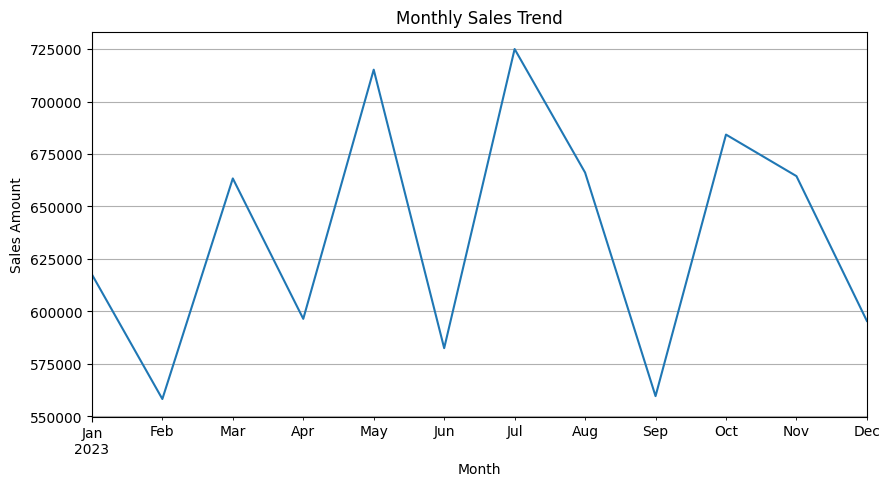

In [8]:
# DATA CLEANING + PREPROCESSING
df = customers.copy()
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])

X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop("CustomerID", axis=1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# MACHINE LEARNING MODEL
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred))
print("\nClassification Report:")
print(classification_report(y_test, pred))

# SALES TREND ANALYSIS
transactions['Date'] = pd.to_datetime(transactions['Date'])
transactions['Month'] = transactions['Date'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.grid()
plt.show()

# CUSTOMER SEGMENTATION (K-Means)
features = df[['Age','MonthlySpend','SupportCalls']]
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)
df['Cluster'] = clusters

fig = px.scatter_3d(df,
                    x='Age', y='MonthlySpend', z='SupportCalls',
                    color='Cluster', title='Customer Segmentation')
fig.show()


In [9]:
# INTERACTIVE DASHBOARD (Plotly)
fig = px.bar(df.groupby('Gender')['Churn'].mean(),
             title="Churn Rate by Gender")
fig.show()

fig = px.box(df, x='Cluster', y='MonthlySpend',
             title="Spend Distribution by Cluster")
fig.show()